In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df["Price"].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

<Axes: >

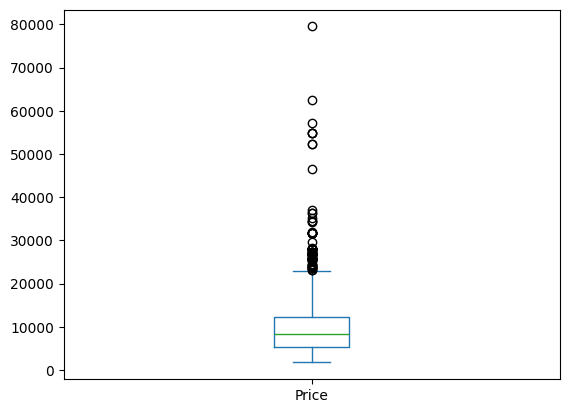

In [6]:
df["Price"].plot.box()

In [12]:
df["Price"].quantile(0.99)    # Percentile

22270.0

In [14]:
df = df[df["Price"]<=df["Price"].quantile(0.99)]

<Axes: >

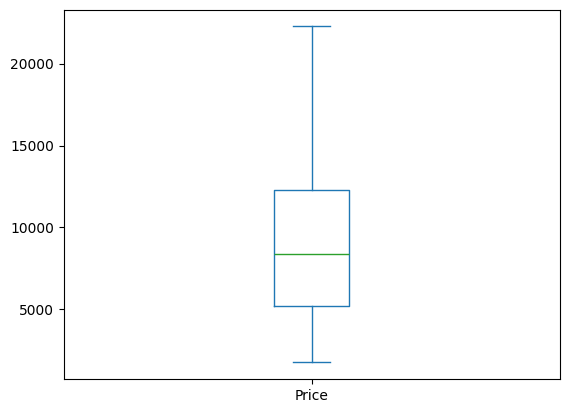

In [15]:
df["Price"].plot.box()

In [16]:
df["Airline"].value_counts()

Airline
Jet Airways                          3784
IndiGo                               2053
Air India                            1735
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 193
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [17]:
df.groupby("Airline")["Price"].mean()

Airline
Air Asia                              5590.260188
Air India                             9447.860519
GoAir                                 5773.321244
IndiGo                                5673.682903
Jet Airways                          11351.290169
Multiple carriers                    10750.907251
Multiple carriers Premium economy    11418.846154
SpiceJet                              4315.116279
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [20]:
df=df[~df["Airline"].isin(["Vistara Premium economy", "Trujet"])]

In [22]:
df["Airline"] = df["Airline"].str.replace(" Premium economy", "")

In [23]:
df["Airline"].value_counts()

Airline
Jet Airways          3784
IndiGo               2053
Air India            1735
Multiple carriers    1199
SpiceJet              817
Vistara               479
Air Asia              319
GoAir                 193
Name: count, dtype: int64

In [25]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

<Axes: xlabel='Date_of_Journey', ylabel='Price'>

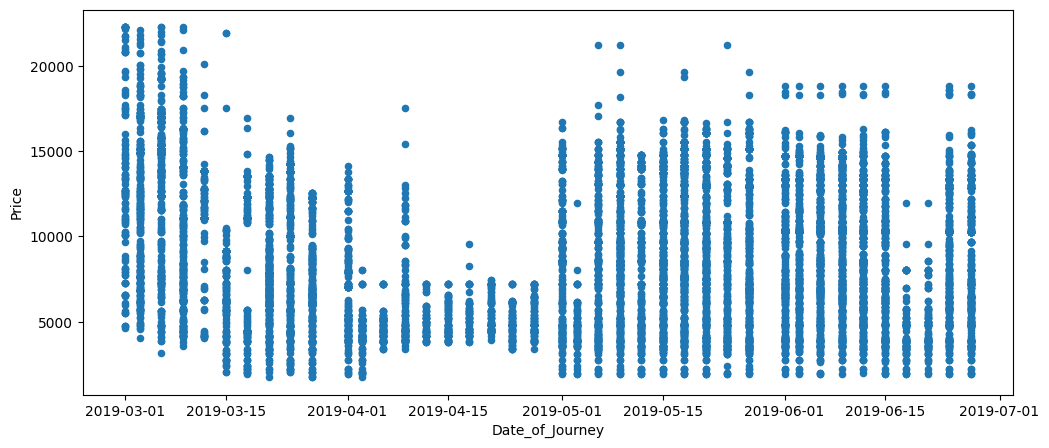

In [28]:
df.plot.scatter(x="Date_of_Journey", y="Price", figsize=(12, 5))

In [29]:
df["Source"].value_counts()

Source
Delhi       4519
Kolkata     2870
Banglore    2122
Mumbai       688
Chennai      380
Name: count, dtype: int64

In [30]:
df["Destination"].value_counts()

Destination
Cochin       4519
Banglore     2870
Delhi        1264
New Delhi     858
Hyderabad     688
Kolkata       380
Name: count, dtype: int64

In [33]:
df[(df["Source"]=="Delhi")&(df["Destination"]=="Cochin")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625
10,Air India,2019-06-01,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
15,Air India,2019-03-03,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
16,SpiceJet,2019-04-15,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,2019-06-15,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10676,Multiple carriers,2019-05-01,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794


In [34]:
df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [38]:
df["Duration"].value_counts().head(10)

Duration
2h 50m    549
1h 30m    386
2h 55m    337
2h 45m    335
2h 35m    327
3h        261
2h 20m    238
2h 30m    220
2h 40m    158
1h 25m    135
Name: count, dtype: int64

In [36]:
df.groupby("Total_Stops")["Price"].mean()

Total_Stops
1 stop      10316.698882
2 stops     12516.162558
3 stops     13112.000000
4 stops     17686.000000
non-stop     5001.859110
Name: Price, dtype: float64